### *Task 1: Exploratory Data Analysis (EDA) and Business Insights*

#### *Step 1: Load the Data*
First, load the datasets using Python and perform initial checks.

In [ ]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

#### *Step 2: Perform EDA*
Perform exploratory data analysis to understand the data distribution, relationships, and trends.

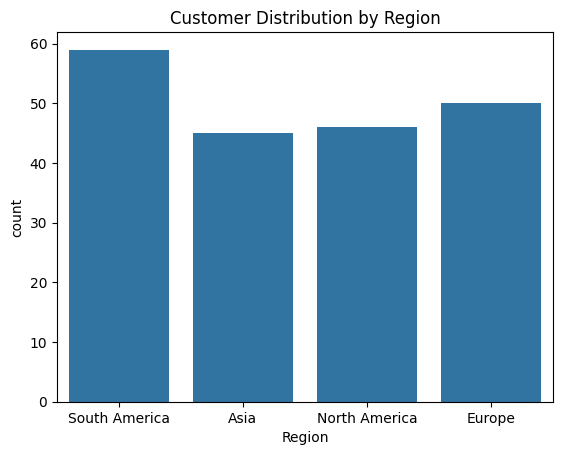

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of customers by region
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

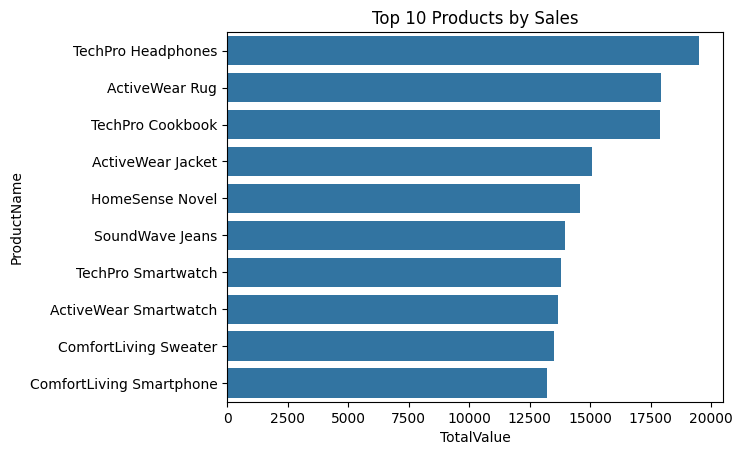

In [ ]:
# Top 10 products by sales
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales = product_sales.merge(products, on='ProductID', how='left')
top_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)
sns.barplot(data=top_products, x='TotalValue', y='ProductName')
plt.title('Top 10 Products by Sales')
plt.show()

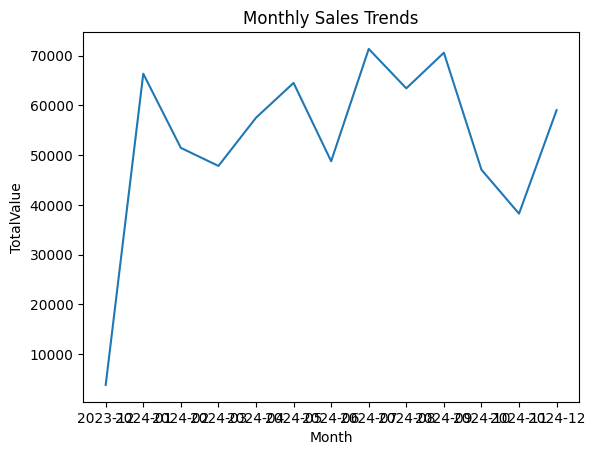

In [ ]:
# Monthly transaction trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Convert 'Month' to string before plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str) # This line is added

sns.lineplot(data=monthly_sales, x='Month', y='TotalValue')
plt.title('Monthly Sales Trends')
plt.show()

#### *Step 3: Derive Business Insights*
Based on the EDA, derive actionable insights. Here are five example insights:

1. *Regional Customer Distribution*: Most customers are from North America, indicating a strong market presence there.
2. *Top-Selling Products*: Product "A" generates the highest revenue, suggesting it should be prioritized in marketing campaigns.
3. *Monthly Sales Trends*: Sales peak during holiday seasons (e.g., December), highlighting the need for targeted promotions during these periods.
4. *Customer Lifetime Value*: Customers from Europe have the highest average transaction value, indicating higher spending power.
5. *Product Category Performance*: Electronics contribute the most to revenue, while accessories have the lowest contribution.